In [1]:
from land_cover import load
from gstools import vario_estimate
from gstools.tools import DEGREE_SCALE, KM_SCALE
from matplotlib import pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [24]:
def analyzeSemivario(gdf, x_var, y_var, field_var, bins=None, plot_autocov=False):
    '''TODO: plot count as bar chart in bg'''
    fig, ax = plt.subplots(1, 1)
    bin_centers, gammas, counts = vario_estimate(
    (gdf[x_var], gdf[y_var]),
    gdf[field_var],
    bins,
    # sampling_size=1000,
    # sampling_seed=42,
    latlon=True,
    geo_scale=KM_SCALE,
    return_counts=True,
    )
    if plot_autocov:
        var = np.var(gdf[field_var]) #, ddof=len(bins)-1)
        ax.scatter(bin_centers, var - gammas)
    else:
        ax.scatter(bin_centers, gammas)
    ax.set_xlabel("Range (km)")
    ax.set_ylabel("Gamma")
    ax.set_title(field_var)
    return ax

In [16]:
gdf = load.loadEfflux()
gdf.head()

,ID,Lat_DD,Lon_DD,AvgOfTempC,AvgOfpH,AvgOfALKum,AvgOfCO2_o,StDevOfCO2,AvgOfpCO2,StDevOfpCO,EID,geometry
0,15031700,58.168286,-133.726735,5.00,6.70,119.88,78.780219,0.000000,1234.682567,0.000000,e0,POINT (-133.72673 58.16829)
1,15051000,58.341619,-134.403160,1.50,7.20,319.68,75.041211,20.143512,1025.733067,249.206896,e1,POINT (-134.40316 58.34162)
2,15056120,59.468840,-135.299331,5.50,6.30,319.68,520.969456,0.000000,8315.749472,0.000000,e2,POINT (-135.29933 59.46884)
3,15056310,59.224951,-135.447940,12.25,6.60,849.15,582.689855,205.993601,11276.942548,795.016390,e3,POINT (-135.44794 59.22495)
4,15057860,55.102713,-131.565289,10.50,6.75,309.69,163.063331,44.072168,3025.846654,105.243959,e4,POINT (-131.56529 55.10271)


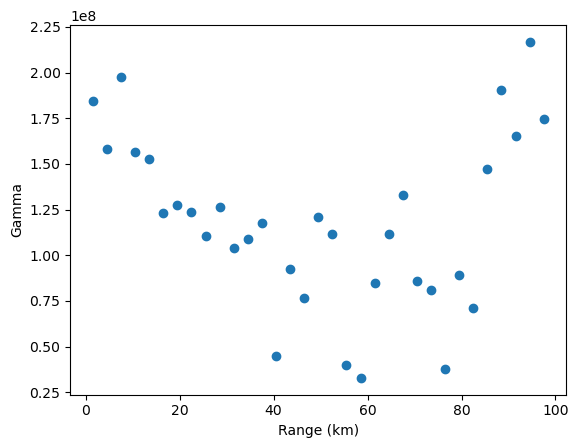

In [10]:
bins = np.arange(0, 100, 3)
_ = analyzeSemivario(gdf, 'Lon_DD','Lat_DD', 'AvgOfpCO2', bins)


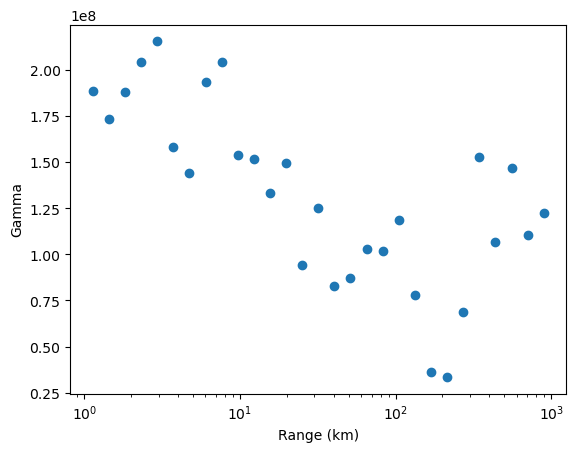

In [11]:
bins = np.logspace(0, 3, 30, base=10)
ax = analyzeSemivario(gdf, 'Lon_DD','Lat_DD', 'AvgOfpCO2', bins)
ax.set_xscale('log')

Variance: 104711954


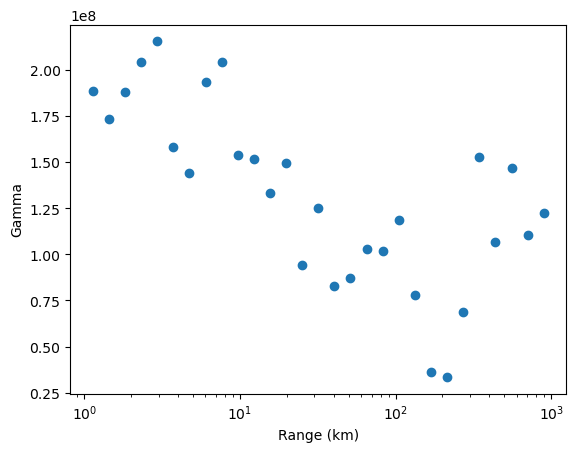

In [14]:
bins = np.logspace(0, 3, 30, base=10)
ax = analyzeSemivario(gdf, 'Lon_DD','Lat_DD', 'AvgOfpCO2', bins, plot_autocov=False)
ax.set_xscale('log')
print(f'Variance: {np.var(gdf.AvgOfpCO2):4.0f}')

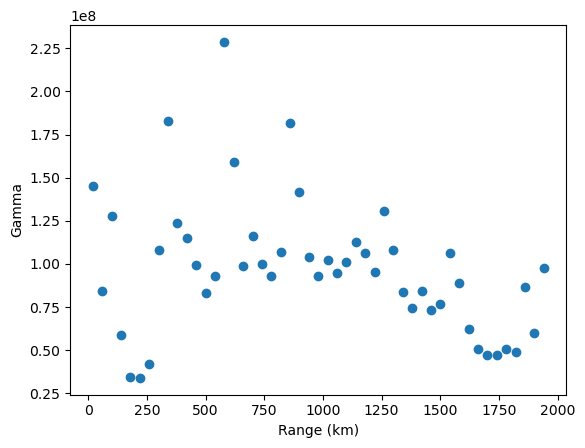

In [13]:
bins = np.arange(0, 2000, 40)
ax = analyzeSemivario(gdf, 'Lon_DD','Lat_DD', 'AvgOfpCO2', bins)

## Other variables

In [36]:
df = load.loadLandCoverJoined()
df.columns

Index(['Lake', 'Lat_DD', 'Lon_DD', 'AvgOfTempC', 'AvgOfpH', 'AvgOfALKum',
       'AvgOfpCO2', 'StDevOfpCO', 'Name', 'Reference', 'mean_bound',
       'max_bound_', 'Area_m2', 'Perim_m2', 'Total_inun_2014',
       'Trees_pct_2014', 'Shrubs_pct_2014', 'Wetlands_pct_2014',
       'Graminoid_pct_2014', 'Sparse_pct_2014', 'Littorals_pct_2014',
       'Littoral_wetland_pct_2014', 'Total_inun_RSD', 'Total_inun_dyn_pct',
       'Hi_water_yr', 'Lo_water_yr', 'Dominant_veg_2014',
       'Dominant_veg_group_2014', 'SDF', 'Perim_area_ratio',
       'Total_inun_change', 'Total_inun_trend'],
      dtype='object')

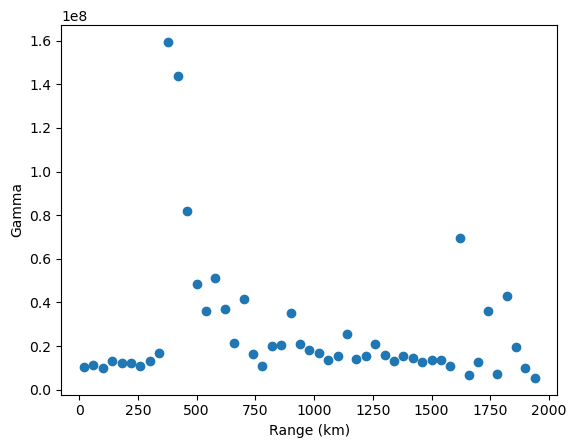

In [21]:
bins = np.arange(0, 2000, 40)
ax = analyzeSemivario(df, 'Lon_DD','Lat_DD', 'AvgOfpCO2', bins)

In [37]:
# re-order
first_columns = ['AvgOfpCO2', 'Lat_DD', 'Lon_DD', 'Area_m2', 'Perim_m2', 'mean_bound',
       'max_bound_', 'Perim_area_ratio', 'SDF']
[df.insert(0, col, df.pop(col)) for col in first_columns[-1::-1]] # re-order cols


[None, None, None, None, None, None, None, None, None]

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_52141/2087161386.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1)


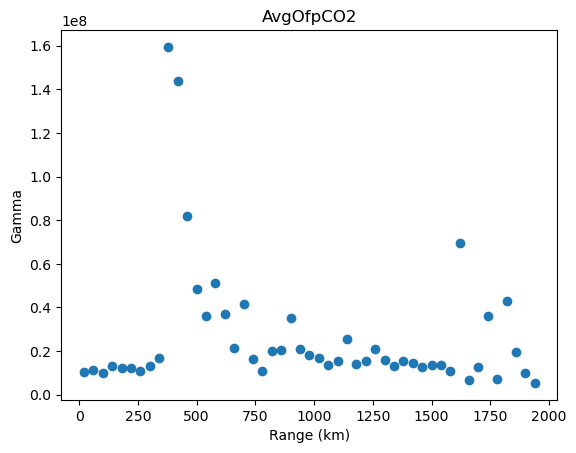

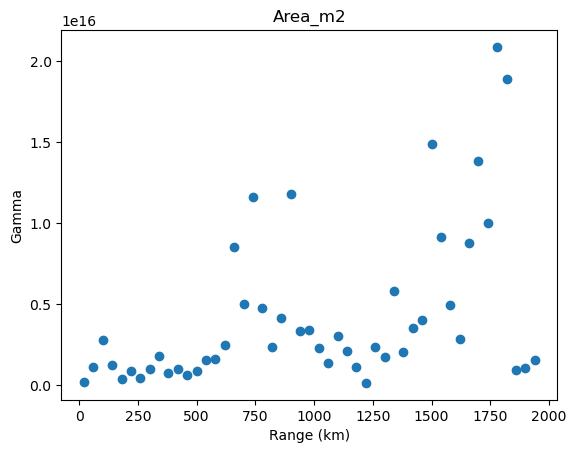

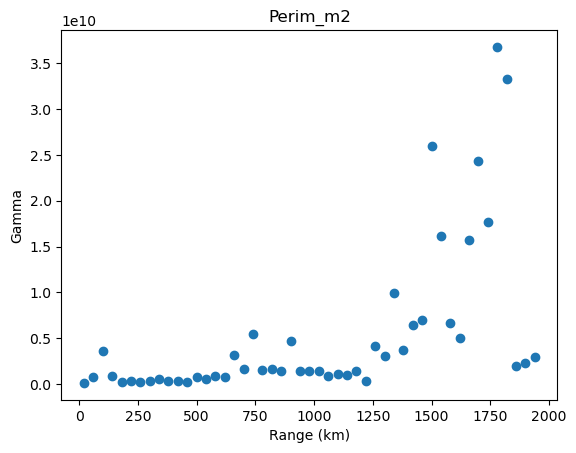

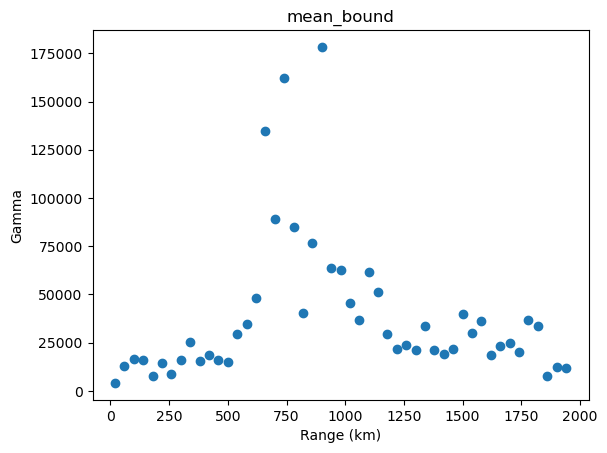

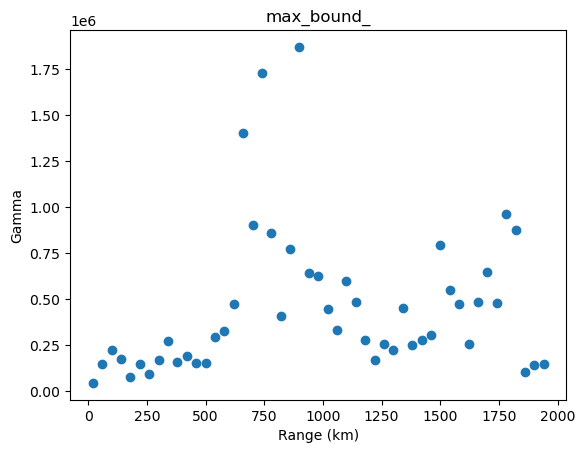

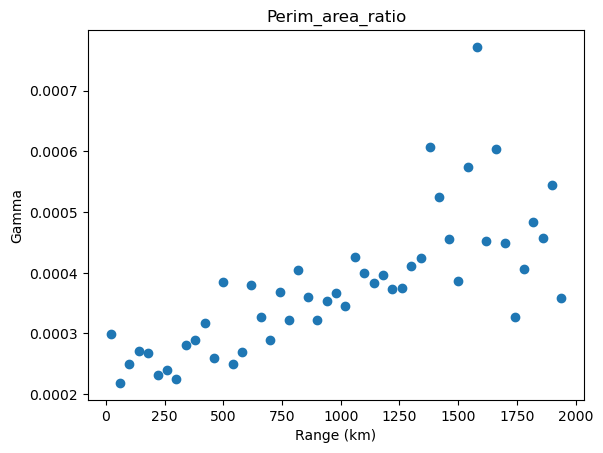

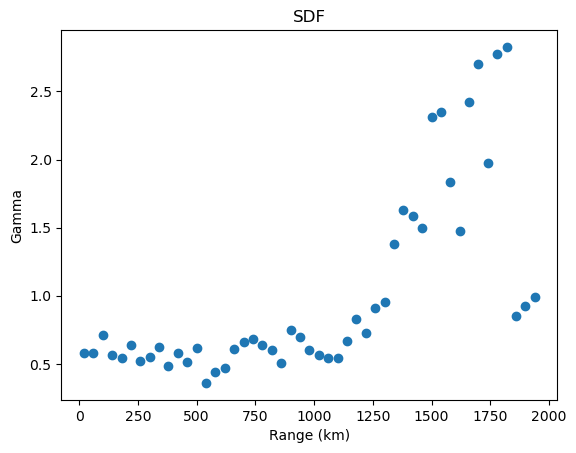

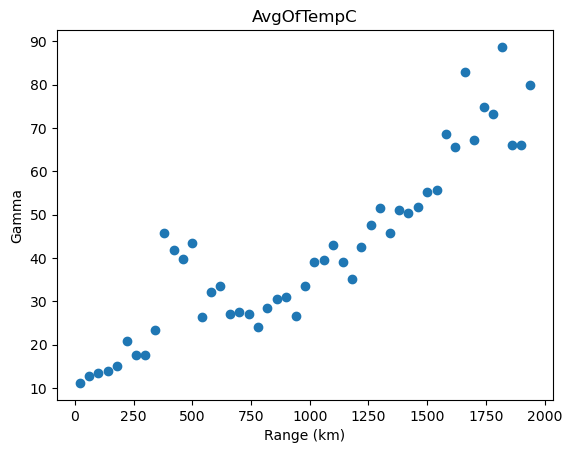

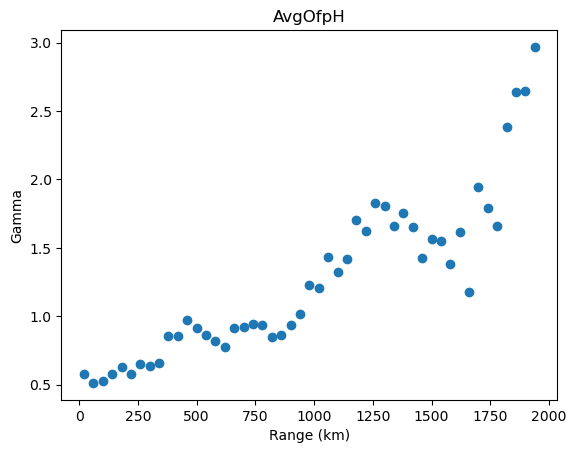

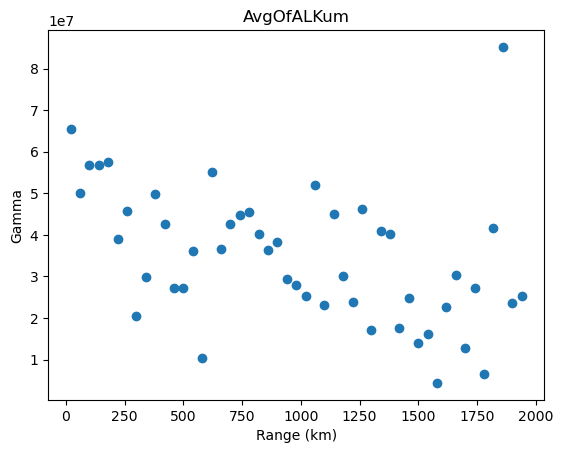

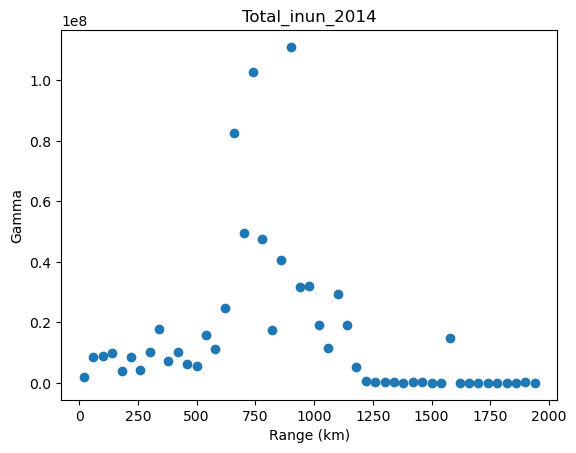

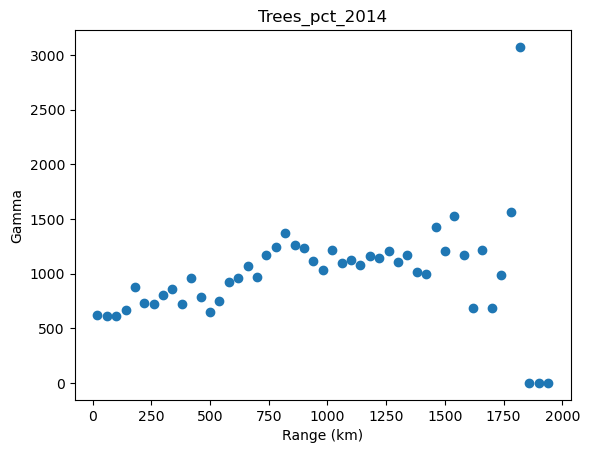

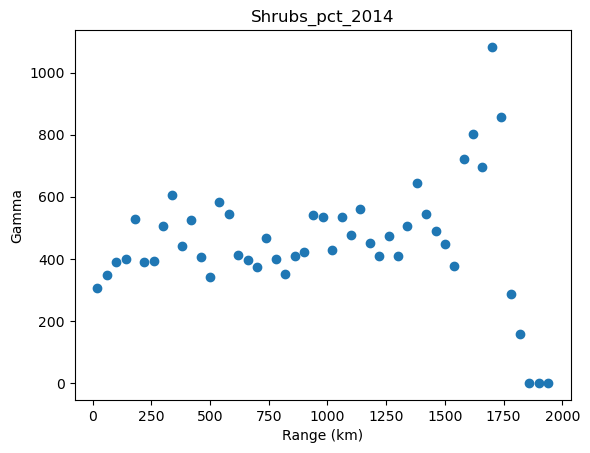

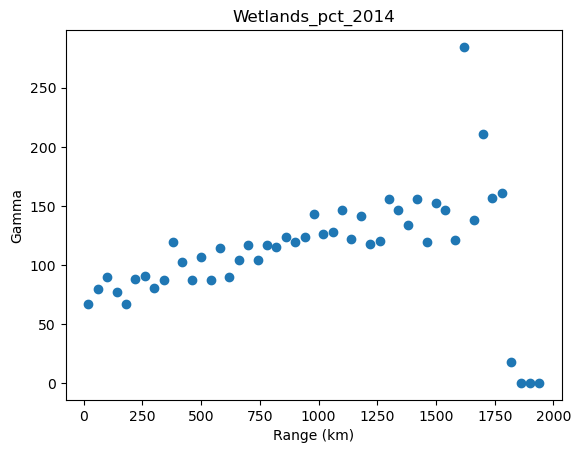

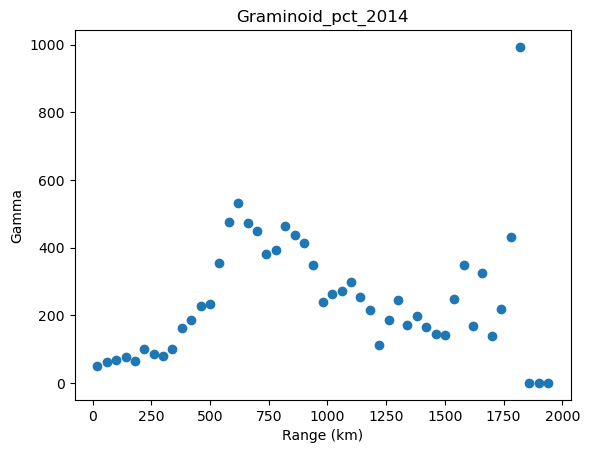

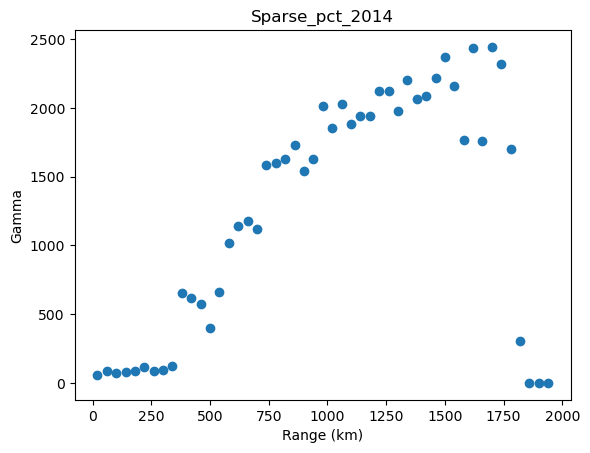

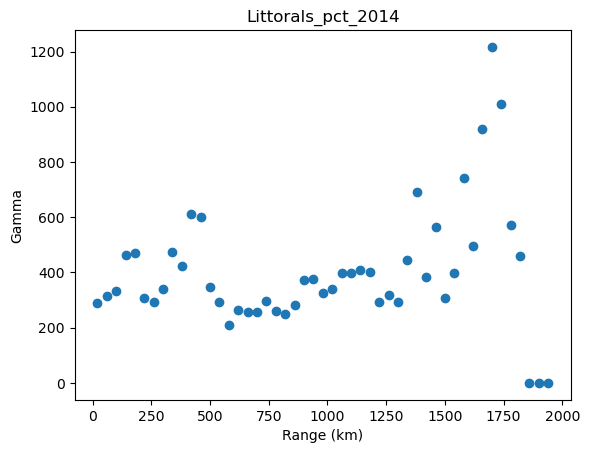

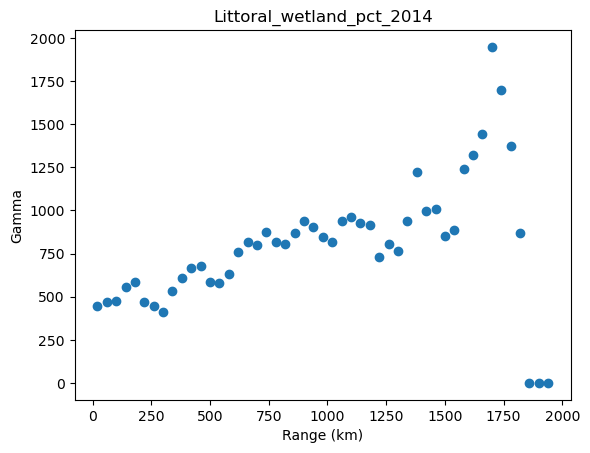

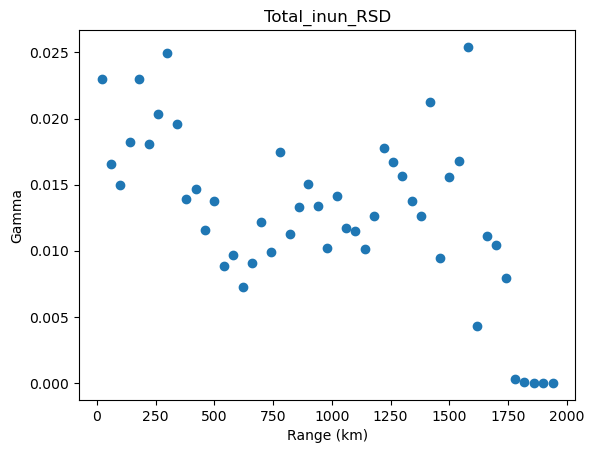

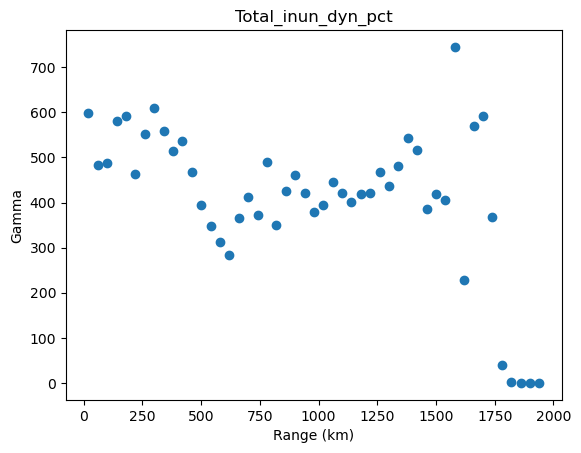

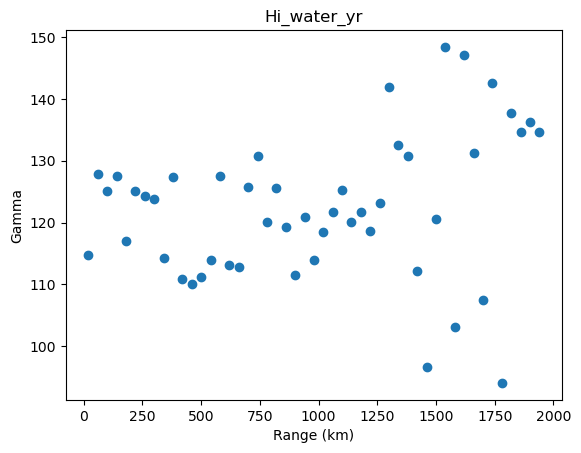

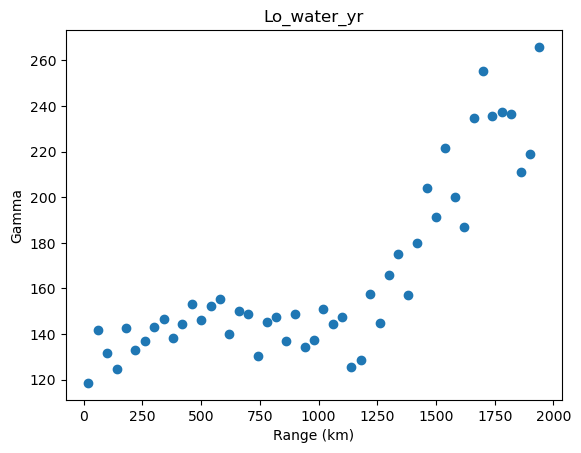

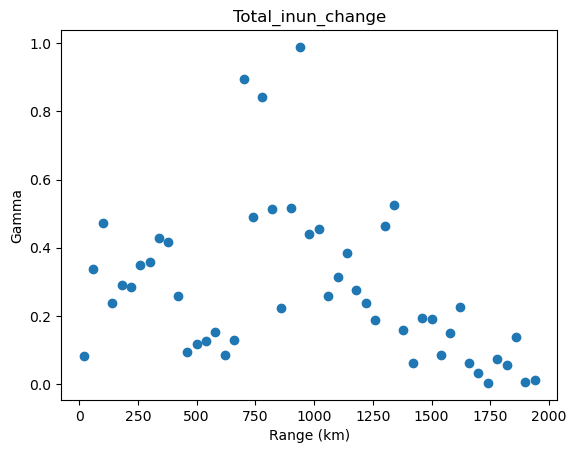

In [38]:
for var in df.columns.drop(['Lake', 'Lat_DD', 'Lon_DD', 'Total_inun_trend', 'Name', 'Reference', 'Dominant_veg_2014',
       'Dominant_veg_group_2014', 'StDevOfpCO']):
    _ = analyzeSemivario(df, 'Lon_DD','Lat_DD', var, bins)